In [1]:
import praw
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from collections import defaultdict 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# client_id='PERSONAL_USE_SCRIPT_14_CHARS', 
#                      client_secret='SECRET_KEY_27_CHARS ', 
#                      user_agent='YOUR_APP_NAME'
reddit = praw.Reddit(client_id='R30fcxAZLJ7Wyw',
                     client_secret='8Zf87krHYa_zXRXPWEF8hK2Twfs',
                     user_agent='project1',
                     username = 'gbatra',
                     password = "HOLYMOLY1999"
                    )
print(reddit.read_only)

False


In [3]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [4]:
# india_subreddit = reddit.subreddit('india')
# print(india_subreddit.description)

### We are looking for additional moderators. If you believe you can help, apply [via modmail](https://www.reddit.com/message/compose?to=%2Fr%2Findia)

###[r/India Rules](https://www.reddit.com/r/India/wiki/rules)

###[PushBullet Notifications](https://www.pushbullet.com/channel?tag=redditindia)

###[r/India Discord Server](https://discord.gg/6V29X7f)

###[Scheduled threads](https://www.reddit.com/r/india/comments/b27sx9/scheduled_threads/)

###[r/India twitter](https://twitter.com/redditindia)

#Filters & Hot Topics:

> **Enable**[All](http://www.reddit.com/r/india/#aa)[Non-Political](http://yy.reddit.com/r/india/#yy)[Politics](http://xx.reddit.com/r/india/#xx)[\[R\]eddiquette](http://zz.reddit.com/r/india/#zz)[AMA](https://am.reddit.com/r/india/search?q=flair%3AAMA&sort=new&restrict_sr=on/#am)[Scheduled](https://sd.reddit.com/r/india/search?q=flair%3AScheduled+-title%3ARandom&restrict_sr=on&sort=new&t=all/#sd)[Science & Tech.](http://bb.reddit.com/r/india/#bb)[Self Posts](http://ss.r

In [5]:
# Each subreddit has five different ways of organizing the topics created by redditors: .hot, .new,
# .controversial, .top, and .gilded. 
# You can also use .search("SEARCH_KEYWORDS") to get only results matching an engine search.

In [6]:
# get 10 hot posts from the MachineLearning subreddit
# hot_posts = india_subreddit.hot(limit=10)

In [8]:
# india_posts = defaultdict(list)
# for post in hot_posts:
#     india_posts['title'].append(post.title)
#     india_posts['score'].append(post.score)
#     india_posts['url'].append(post.url)
#     india_posts['num_comments'].append(post.num_comments)
#     india_posts['text'].append(post.selftext)
#     india_posts['created'].append(post.created)
#     #  a limit of None means that all MoreComments objects will be replaced until there are none left
#     for comment in post.comments:
#         india_posts['comments'].append(comment)

# india_posts

# This gave out an error ' ValueError: arrays must all be same length' when being converted to Dataframe

In [9]:
# india_posts = defaultdict(list)
# for post in hot_posts:
#     india_posts['title'].append(post.title)
#     india_posts['score'].append(post.score)
#     india_posts['url'].append(post.url)
#     india_posts['num_comments'].append(post.num_comments)
#     india_posts['text'].append(post.selftext)
#     india_posts['created'].append(post.created)
#     #  a limit of None means that all MoreComments objects will be replaced until there are none left
#     post.comments.replace_more(limit=None)
#     all_comments = ''
#     for comment in post.comments:
#         all_comments = all_comments + ' ' + comment.body
    
#     india_posts['comments'].append(all_comments)

# india_posts

defaultdict(list,
            {'title': ['Coronavirus (COVID-19) Megathread - News and Updates - 4',
              '[Monthly Happiness Thread] Randians, please share a good/positive/happy news happening in your life recently ! :)',
              'Nisha Jindal, with 10k FB fans, turns out to be a man',
              'Wealth inequality in India. A monthly salary 34000 is enough to make you top 1% of the population!',
              'Everyone, Puffy the Superdog. (ZenFone 6)',
              'COVID-19: Violence Breaks Out in a Bengaluru Hotspot; 54 Arrested',
              'Pregnant woman in Bengaluru walks 5 km in search of hospital, doctor couple save baby',
              'The Lockdown Cleaned the Ganga More Than ‘Namami Gange’ Ever Did',
              'Goa becomes coronavirus-free after last active case tests negative; no new case since April 3',
              'Why the fuck am I seeing this ad? What the fuck is wrong with YouTube?'],
             'score': [129, 5, 678, 426, 361, 159, 970

In [10]:
# india_postsdf = pd.DataFrame(india_posts)

In [11]:
# _timestamp = india_postsdf["created"].apply(get_date)
# india_postsdf = india_postsdf.assign(timestamp = _timestamp)
# del india_postsdf['created']

In [12]:
# # preprocess the title, comments and text
# def preprocess(text):

#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
#     filtered_sentence = [w for w in word_tokens if not w in stop_words]
#     filtered_sentence = ''
#     for w in word_tokens:
#         if w not in stop_words:
#             if w.isalnum():
#                 w = w.lower()
#                 filtered_sentence = filtered_sentence + ' ' + w
#     return(filtered_sentence)

In [13]:
# india_postsdf['title'] = india_postsdf['title'].apply(preprocess)

In [14]:
# india_postsdf['comments'] = india_postsdf['comments'].apply(preprocess)

In [15]:
# india_postsdf['text'] = india_postsdf['text'].apply(preprocess)

In [16]:
# india_postsdf.to_csv('india_posts.csv', index=False)

In [4]:
india_posts = pd.read_csv('india_posts.csv')
india_posts.head(10)

title  score  \
0              coronavirus megathread news updates 4    129   
1   monthly happiness thread randians please shar...      5   
2                 nisha jindal 10k fb fans turns man    678   
3   wealth inequality india a monthly salary 3400...    426   
4                  everyone puffy superdog zenfone 6    361   
5   violence breaks out bengaluru hotspot 54 arre...    159   
6   pregnant woman bengaluru walks 5 km search ho...    970   
7   the lockdown cleaned ganga more than namami g...     87   
8   goa becomes last active case tests negative n...    669   
9       why fuck i seeing ad what fuck wrong youtube    442   

                                                 url  num_comments  \
0  https://www.reddit.com/r/india/comments/g1zi21...          1613   
1  https://www.reddit.com/r/india/comments/g4d2ix...             8   
2  https://timesofindia.indiatimes.com/india/nish...            93   
3  https://timesofindia.indiatimes.com/calculator...            92   
4                https://i.redd.it/bk0fba8havt41.jpg            24   
5  https://www.thequint.com/news/india/coronaviru...            23   
6  https://www.thenewsminute.com/article/pregnant...            44   
7  https://science.thewire.in/environment/ganga-r...             4   
8  https://www.timesnownews.com/india/article/goa...            43   
9                https://i.redd.it/7ewkbad6ttt41.jpg           176   

                                                text  \
0   fundraisers donation links https via amnesty ...   
1   3 links feb mht https jan mht https dec mht h...   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7                                                NaN   
8                                                NaN   
9                                                NaN   

                                            comments            timestamp  
0   fundraisers donation links https via amnesty ...  2020-04-16 09:30:15  
1   working home since past one month for someone...  2020-04-20 08:20:40  
2   i think gomie breaking bad said the internet ...  2020-04-20 14:54:52  
3   top per month imagine top 1 monthly salary 34...  2020-04-20 17:11:45  
4   must nice trees around house and free space l...  2020-04-20 13:58:37  
5   feel sorry asha first line medical team video...  2020-04-20 17:39:56  
6   i similar issues mumbai my father jaundice ne...  2020-04-20 06:38:42  
7            now modi mama take claim cleaning ganga  2020-04-20 19:04:59  
8   shows goa tested 826 people 19 april surely c...  2020-04-20 07:29:43  
9   download youtube vanced mark nsfw translation...  2020-04-20 08:58:20

In [5]:
india_posts.dtypes

title           object
score            int64
url             object
num_comments     int64
text            object
comments        object
timestamp       object
dtype: object

In [19]:
# india_posts['title'] = pd.Series(india_posts['title'], dtype='string')
# india_posts.loc[:,'title'] = india_posts.loc[:, 'title'].astype(str)
# india_posts['title'].apply(str)
# india_posts['title'] = india_posts['title'].astype('|S')
# india_posts['title']

In [13]:
flairs={0:'Politics',1:'Non-Political',2:'AskIndia', 3:"[R]eddiquette", 4:'Science/Technology', 5:'Policy/Economy', 6:'Business/Finance', 7:'Scheduled', 8:'Sports', 9:'Food', 10:'Photography', 11:'AMA'}

In [21]:
# data = defaultdict(list)
# for flair in flairs:
#     search_flair = india_subreddit.search(flairs[flair], limit=100)
#     for post in search_flair:
#         data['flair'].append(flair)
#         data['title'].append(post.title)
#         data['score'].append(post.score)
#         data['url'].append(post.url)
#         data['num_comments'].append(post.num_comments)
#         data['text'].append(post.selftext)
#         data['created'].append(post.created)
#         post.comments.replace_more(limit=None)
#         all_comments = ''
#         for comment in post.comments:
#             all_comments = all_comments + ' ' + comment.body

#         data['comments'].append(all_comments)
# data

defaultdict(list,
            {'flair': ['Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
              'Politics',
           

In [22]:
# datadf = pd.DataFrame(data)
# _timestamp = datadf['created'].apply(get_date)
# datadf = datadf.assign(timestamp = _timestamp)
# del datadf['created']

# datadf['title'] = datadf['title'].apply(preprocess)
# datadf['comments'] = datadf['comments'].apply(preprocess)
# datadf['text'] = datadf['text'].apply(preprocess)

In [23]:
# datadf.to_csv('dataset.csv', index=False)

In [24]:
# len(datadf['title'])

1118

In [7]:
datadf = pd.read_csv('dataset.csv')
datadf.head(10)

flair                                              title  score  \
0  Politics                           a polite request indians    402   
1  Politics   pitting community political party fucking stupid    195   
2  Politics   a new political party gave full front page ad...    729   
3  Politics   hit backlash posts lack medical gear doctors ...    400   
4  Politics   politics time corona wb cm questions centre c...     86   
5  Politics   i curious indian politicians think good job p...     42   
6  Politics       in trying time let try little less bit human    215   
7  Politics   aap woeful response delhi communal violence r...    213   
8  Politics   politeness actor swara bhasker kunal kamra di...    736   
9  Politics   indian states uts renamed countries similar p...    182   

                                                 url  num_comments  \
0  https://www.reddit.com/r/india/comments/g2ct57...            82   
1  https://www.reddit.com/r/india/comments/futac9...            73   
2                https://i.redd.it/yjo9wpy38el41.jpg           146   
3  https://theprint.in/india/hit-by-backlash-over...            67   
4  https://www.timesnownews.com/india/article/pol...            22   
5  https://www.reddit.com/r/india/comments/fs887w...            51   
6  https://www.reddit.com/r/india/comments/flm79b...            56   
7  https://scroll.in/article/954991/aaps-woeful-r...            45   
8  https://scroll.in/video/952528/f-your-politene...           177   
9                https://i.redd.it/hk9o11b8dun41.png            20   

                                                text  \
0   i know situation countries india i seen a lot...   
1   first let start saying stupid whatever muslim...   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5   personally i would pick pinarayi vijayan cpim...   
6   i shocking interaction morning a bunch us var...   
7                                                NaN   
8                                                NaN   
9                                                NaN   

                                            comments            timestamp  
0   our society thrives abuse power we let many i...  2020-04-17 00:27:46  
1   our country far moment turning back best hope...  2020-04-05 02:28:28  
2   this looks like iipm ad 1 where get funds ful...  2020-03-08 20:06:11  
3   well some people really deserve die this coun...  2020-03-27 01:47:25  
4   oh ffs yellow orange green red used emergency...  2020-04-10 02:33:54  
5   if anything positive fight covid give credits...  2020-03-31 20:29:29  
6   what incredibly narrow minded person our grea...  2020-03-20 15:03:16  
7   so argument dms could commanded police armed ...  2020-03-04 18:06:24  
8   i tend agree after first delhi shootings arna...  2020-02-10 18:21:10  
9   nice name uttar pradesh ajay bisht gon na hap...  2020-03-21 04:27:45

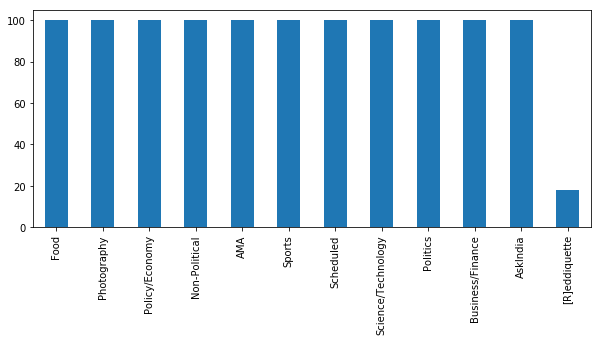

In [8]:
plt.figure(figsize=(10,4))
datadf.flair.value_counts().plot(kind='bar');

In [37]:
# The data distribution is imabalanced, with the [R]eddiquette class having low data as compared to the other classes.
# The minority class will be treated as outlier and ignored.
#  Decision trees frequently perform well on imbalanced data. 

In [14]:
X = datadf.title
y = datadf.flair
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

In [15]:
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (838,)
Number transactions y_train dataset:  (838,)
Number transactions X_test dataset:  (280,)
Number transactions y_test dataset:  (280,)


In [16]:
# # Generating Synthetic Samples
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=27)
# X_train, y_train = sm.fit_sample(X_train, y_train)

ValueError: could not convert string to float: ' hiring 5 writers wfh 3 month project rs 3lk per mo'

In [ ]:
# # describes info about oversampled train set and test set 
# print("Number transactions X_train dataset: ", X_train.shape) 
# print("Number transactions y_train dataset: ", y_train.shape) 
# print("Number transactions X_test dataset: ", X_test.shape) 
# print("Number transactions y_test dataset: ", y_test.shape)

In [28]:
# Common text classification algorithms : 
# logistic regression, support vector machine, naive Bayes classifier, decision trees, random forest, K nearest neighbor

In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

# %%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
#Linear Support Vector Machine
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

In [ ]:
# Doc2Vec and 